In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv("ts_dataset.csv")

In [3]:
df.head()

datetime  rendszerterheles
0  2018-07-02 00:00:00            4191.0
1  2018-07-02 00:15:00            4116.0
2  2018-07-02 00:30:00            4060.0
3  2018-07-02 00:45:00            4025.0
4  2018-07-02 01:00:00            3976.0

In [4]:
df.shape

(106176, 2)

In [5]:
df.describe()

rendszerterheles
count     106176.000000
mean        5202.597362
std          753.330119
min         3159.000000
25%         4632.000000
50%         5226.000000
75%         5736.000000
max         7119.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106176 entries, 0 to 106175
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          106176 non-null  object 
 1   rendszerterheles  106176 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [7]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

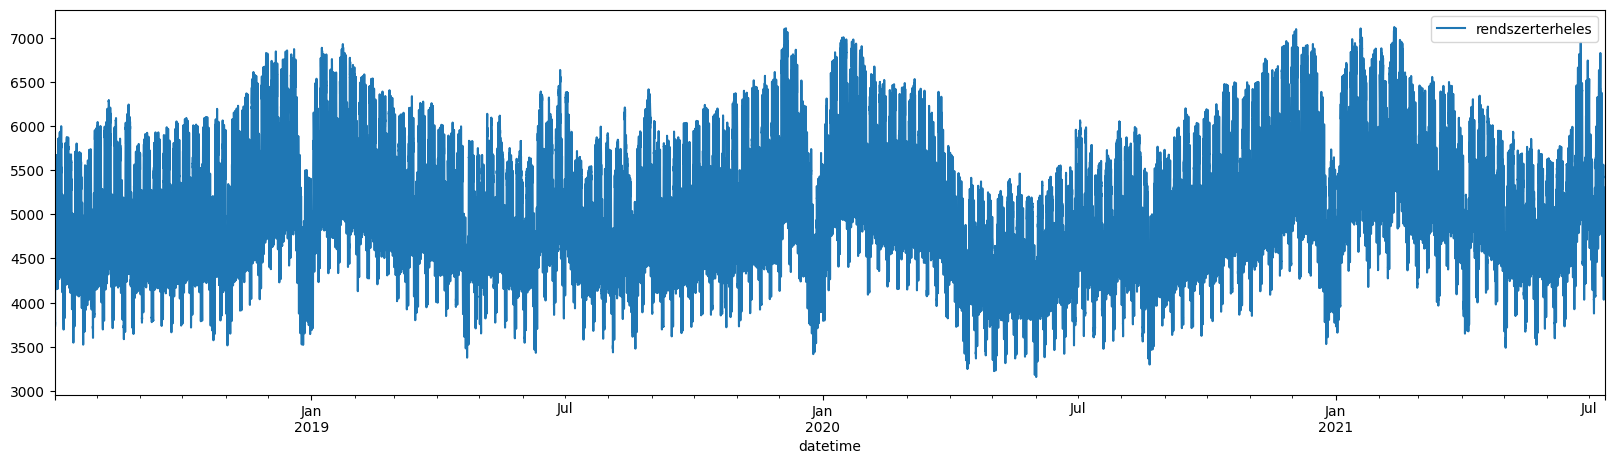

In [8]:
df.plot(figsize=(20, 5))
plt.show()

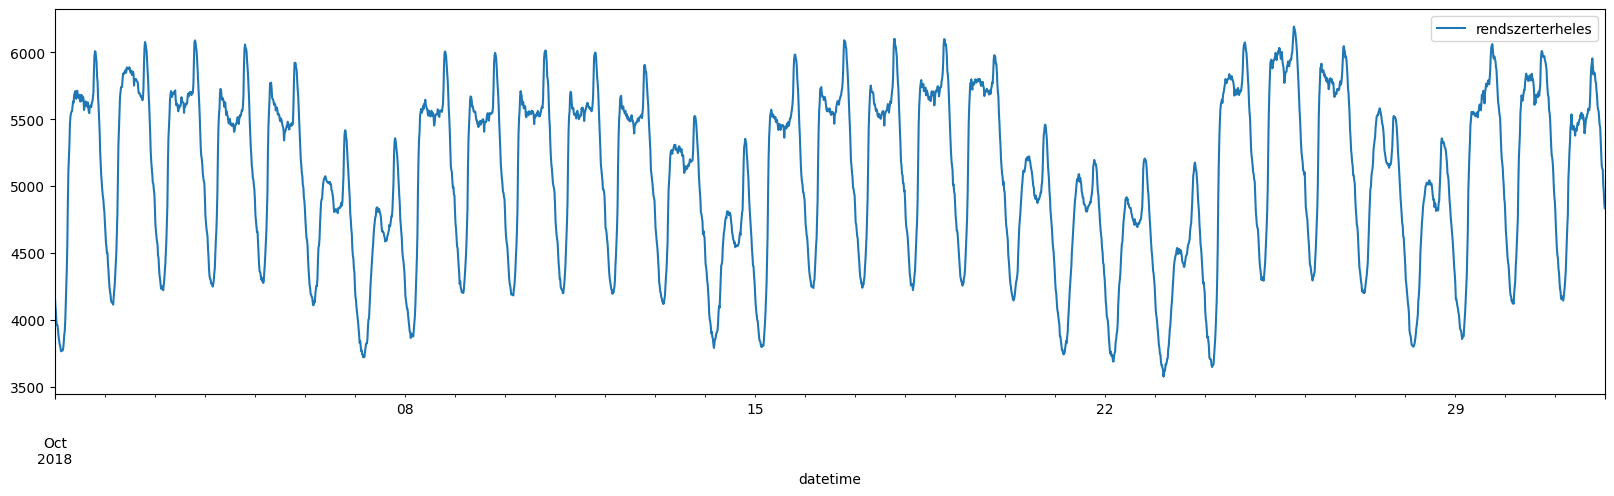

In [9]:
df.loc["2018-10"].plot(figsize=(20, 5))
plt.show()

In [10]:
df["month"] = df.index.month
df["dayofweek"] = df.index.dayofweek
df["time"] = df.index.time
df["date"] = df.index.date

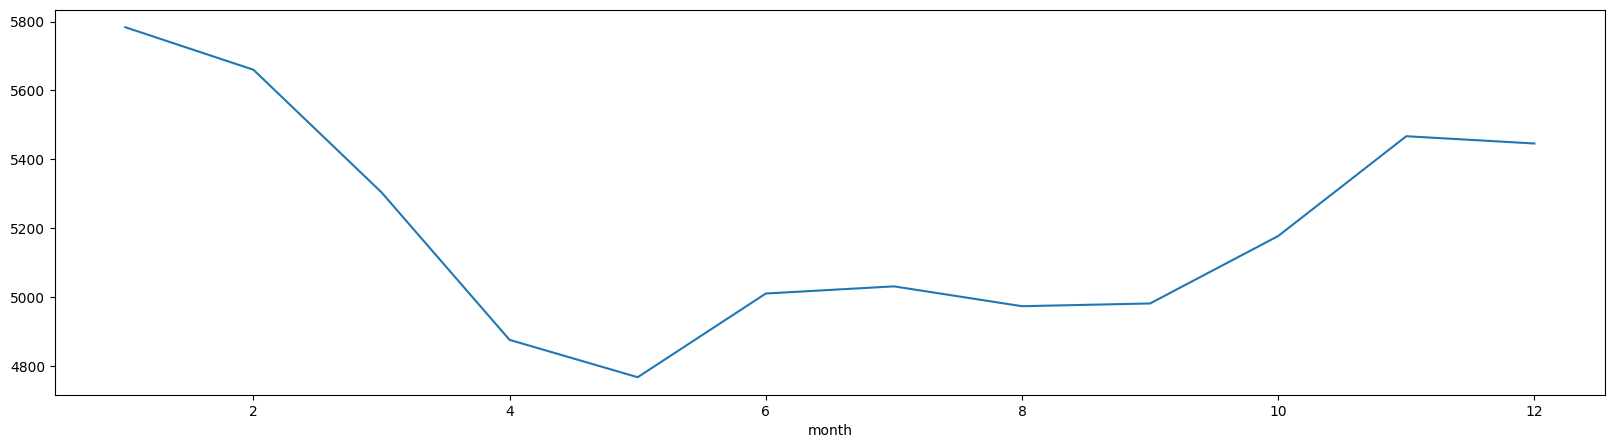

In [11]:
df.groupby("month")["rendszerterheles"].mean().plot(figsize=(20, 5))
plt.show()

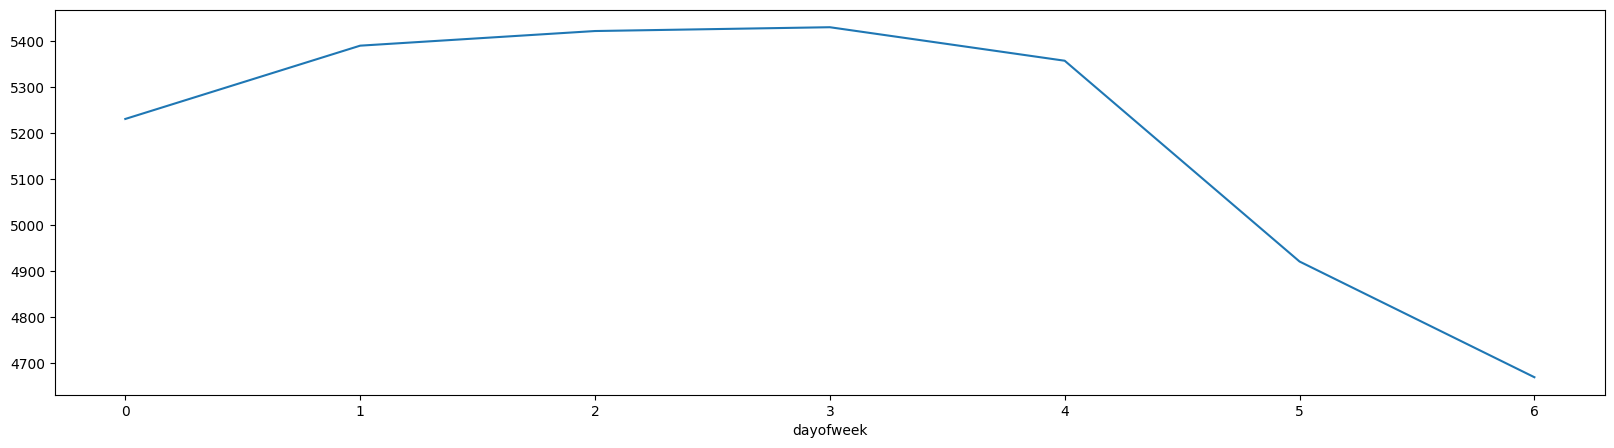

In [12]:
df.groupby("dayofweek")["rendszerterheles"].mean().plot(figsize=(20, 5))
plt.show()

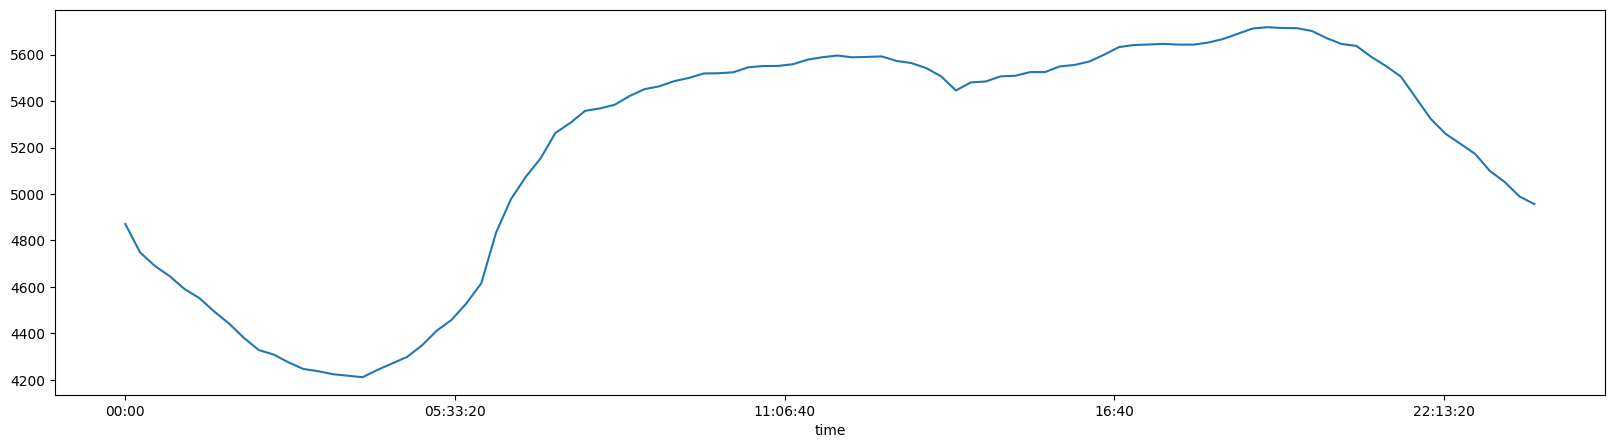

In [13]:
df.groupby("time")["rendszerterheles"].mean().plot(figsize=(20, 5))
plt.show()

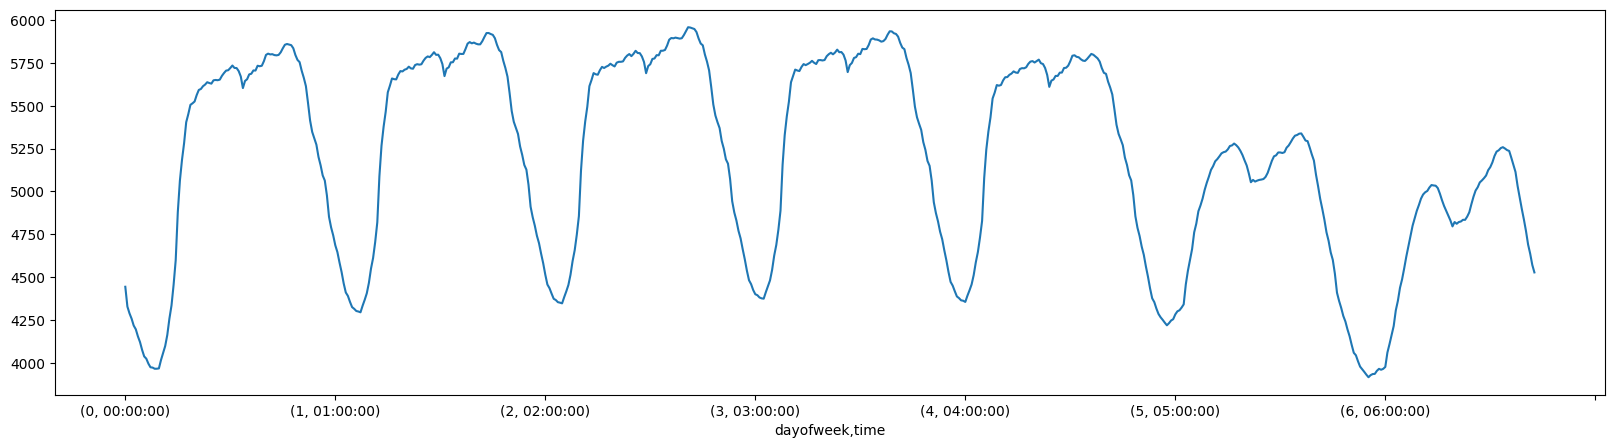

In [14]:
df.groupby(["dayofweek", "time"])["rendszerterheles"].mean().plot(figsize=(20, 5))
plt.show()

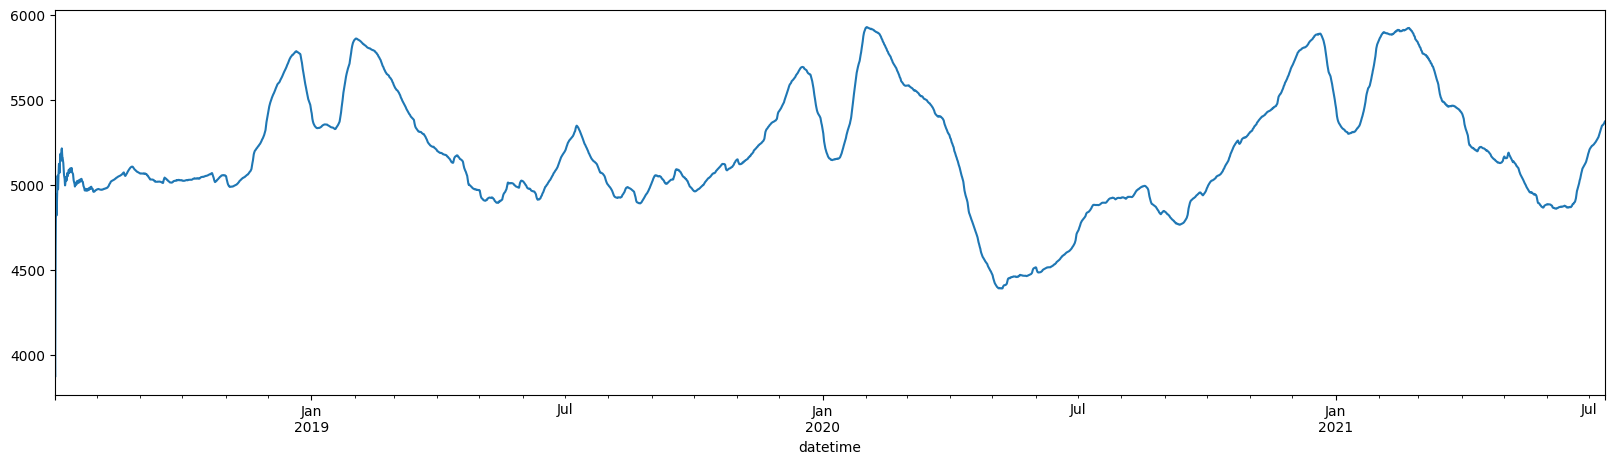

In [15]:
df["rendszerterheles"].rolling("28d").mean().plot(figsize=(20, 5))
plt.show()

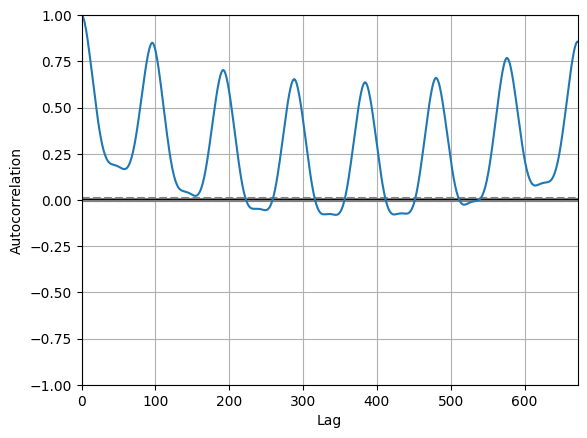

In [16]:
# This is the slow way
pd.plotting.autocorrelation_plot(df["rendszerterheles"]).set_xlim(0, 4*24*7)
plt.show()

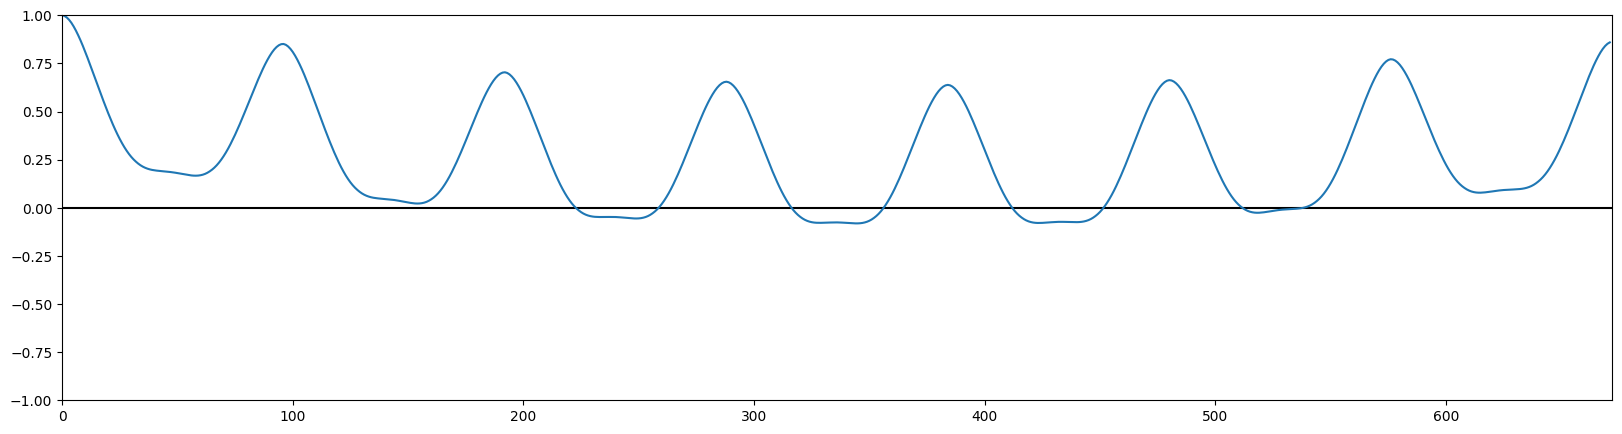

In [17]:
score_list = []
for i in range(0, 4*24*7):
    score = df["rendszerterheles"].autocorr(i)
    score_list.append(score)

plt.figure(figsize=(20, 5))
plt.xlim(0, 4*24*7)
plt.ylim(-1, 1)
plt.axhline(0, color="black")
plt.plot(score_list)
plt.show()

In [18]:
df["datetime_2d"] = df.index - pd.to_timedelta(2, unit="d")
df["datetime_7d"] = df.index - pd.to_timedelta(7, unit="d")

value_map = df["rendszerterheles"].to_dict()

df["rendszerterheles_2d"] = df["datetime_2d"].map(value_map)
df["rendszerterheles_7d"] = df["datetime_7d"].map(value_map)

In [19]:
df.isnull().sum()

rendszerterheles         0
month                    0
dayofweek                0
time                     0
date                     0
datetime_2d              0
datetime_7d              0
rendszerterheles_2d    192
rendszerterheles_7d    672
dtype: int64

In [20]:
from workalendar.europe import Hungary

cal = Hungary()

In [21]:
year_list = df.index.year.unique().tolist()
holiday_df = pd.DataFrame()
for year in year_list:
    temp_df = pd.DataFrame(cal.holidays(year), columns=["date", "holiday"])
    holiday_df = pd.concat([holiday_df, temp_df])
holiday_df.set_index("date", inplace=True)
holiday_map = holiday_df["holiday"].to_dict()
df["is_holiday"] = df["date"].map(holiday_map).notnull()

In [22]:
month_dummies = pd.get_dummies(df["month"], drop_first=True, prefix="month")
dayofweek_dummies = pd.get_dummies(df["dayofweek"], drop_first=True, prefix="dayofweek")
df = pd.concat([df, month_dummies, dayofweek_dummies], axis=1)
df.head()

rendszerterheles  month  dayofweek      time        date  \
datetime                                                                        
2018-07-02 00:00:00            4191.0      7          0  00:00:00  2018-07-02   
2018-07-02 00:15:00            4116.0      7          0  00:15:00  2018-07-02   
2018-07-02 00:30:00            4060.0      7          0  00:30:00  2018-07-02   
2018-07-02 00:45:00            4025.0      7          0  00:45:00  2018-07-02   
2018-07-02 01:00:00            3976.0      7          0  01:00:00  2018-07-02   

                            datetime_2d         datetime_7d  \
datetime                                                      
2018-07-02 00:00:00 2018-06-30 00:00:00 2018-06-25 00:00:00   
2018-07-02 00:15:00 2018-06-30 00:15:00 2018-06-25 00:15:00   
2018-07-02 00:30:00 2018-06-30 00:30:00 2018-06-25 00:30:00   
2018-07-02 00:45:00 2018-06-30 00:45:00 2018-06-25 00:45:00   
2018-07-02 01:00:00 2018-06-30 01:00:00 2018-06-25 01:00:00   

                     rendszerterheles_2d  rendszerterheles_7d  is_holiday  \
datetime                                                                    
2018-07-02 00:00:00                  NaN                  NaN       False   
2018-07-02 00:15:00                  NaN                  NaN       False   
2018-07-02 00:30:00                  NaN                  NaN       False   
2018-07-02 00:45:00                  NaN                  NaN       False   
2018-07-02 01:00:00                  NaN                  NaN       False   

                     ...  month_9  month_10  month_11  month_12  dayofweek_1  \
datetime             ...                                                       
2018-07-02 00:00:00  ...    False     False     False     False        False   
2018-07-02 00:15:00  ...    False     False     False     False        False   
2018-07-02 00:30:00  ...    False     False     False     False        False   
2018-07-02 00:45:00  ...    False     False     False     False        False   
2018-07-02 01:00:00  ...    False     False     False     False        False   

                     dayofweek_2  dayofweek_3  dayofweek_4  dayofweek_5  \
datetime                                                                  
2018-07-02 00:00:00        False        False        False        False   
2018-07-02 00:15:00        False        False        False        False   
2018-07-02 00:30:00        False        False        False        False   
2018-07-02 00:45:00        False        False        False        False   
2018-07-02 01:00:00        False        False        False        False   

                     dayofweek_6  
datetime                          
2018-07-02 00:00:00        False  
2018-07-02 00:15:00        False  
2018-07-02 00:30:00        False  
2018-07-02 00:45:00        False  
2018-07-02 01:00:00        False  

[5 rows x 27 columns]

In [23]:
dummy_cols = month_dummies.columns.tolist() + dayofweek_dummies.columns.tolist()
X_cols = ["rendszerterheles_2d", "rendszerterheles_7d", "is_holiday"] + dummy_cols
y_col = "rendszerterheles"
df.dropna(inplace=True)

In [24]:
X = df[X_cols]
y = df[y_col]

X_train = X.iloc[:80000]
y_train = y.iloc[:80000]
X_test = X.iloc[80001:]
y_test = y.iloc[80001:]

model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [25]:
# Baseline
mape = mean_absolute_percentage_error(y_test[:4*24], X_test["rendszerterheles_7d"][:4*24])
print(f"MAPE: {mape}")

MAPE: 0.029374774907352446


In [26]:
prediction = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test[:4*24], prediction[:4*24])
print(f"MAPE: {mape}")

MAPE: 0.026815222744761318


In [27]:
prediction_df = pd.DataFrame()
dates_list = pd.date_range(start="2021-02-01", end="2021-02-03").tolist()
for date in dates_list:
    df_train = df.loc[df.index < (date - pd.to_timedelta(1, unit="d"))]
    df_test = df.loc[df.index.date == date]

    X_train = df_train[X_cols]
    y_train = df_train[y_col]
    X_test = df_test[X_cols]
    y_test = df_test[y_col]

    model = GradientBoostingRegressor(random_state=0)
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    temp_df = pd.DataFrame(
        {
            "datetime": df_test.index,
            "actual": y_test["rendszerterheles"],
            "prediction": prediction,
        }
    )
    prediction_df = pd.concat([prediction_df, temp_df])

mean_absolute_percentage_error(prediction_df["actual"], prediction_df["prediction"])
print(f"MAPE: {mape}")

ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required by GradientBoostingRegressor.

In [ ]:
prediction_df["actual"].plot(figsize=(20, 5))
prediction_df["prediction"].plot(figsize=(20, 5))
plt.show()